# Detailed Analysis

Some of the following are correlations that exist between certain variables, but for this notebook the use of Unsupervised Learning to observe patterns is not included, that is discussed in more detail in a subsequent notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
df = pd.read_csv('../data/processed/moods_2024_2025.csv')

In [3]:
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

## 1. Relationship between the feeling of rest (sleep_level) and mood

**sleep_level**:
- Sin dormir: 0
- Sueño malo: 1
- Sueño medio: 2
- Buen sueño: 3
- Sueño temprano: 4
---
**mood**:
- Horrible: 0
- Mal: 1
- Meh: 2
- Bien: 3
- Increíble: 4

In [4]:
print(df[['mood_numeric', 'sleep_level_numeric']].describe(), "\n")
print(df[['mood', 'sleep_level']].describe())

print("\n Good days stats")
good_days = df[(df['mood'] == 'Increíble') | (df['mood'] == 'Bien')]
print(good_days[['mood_numeric', 'sleep_level_numeric']].describe(), "\n")
print(good_days[['mood', 'sleep_level']].describe())

       mood_numeric  sleep_level_numeric
count    553.000000           553.000000
mean       2.786618             2.332731
std        0.609141             0.759931
min        0.000000             0.000000
25%        3.000000             2.000000
50%        3.000000             2.000000
75%        3.000000             3.000000
max        4.000000             4.000000 

        mood sleep_level
count    553         553
unique     5           5
top     Bien  Buen sueño
freq     407         269

 Good days stats
       mood_numeric  sleep_level_numeric
count    434.000000           434.000000
mean       3.062212             2.387097
std        0.241819             0.733506
min        3.000000             0.000000
25%        3.000000             2.000000
50%        3.000000             3.000000
75%        3.000000             3.000000
max        4.000000             4.000000 

        mood sleep_level
count    434         434
unique     2           5
top     Bien  Buen sueño
freq     407   

In [5]:
sleep_order = ['Sueño temprano', 'Buen sueño', 'Sueño medio', 'Sueño malo', 'Sin dormir']
mood_order = ['Increíble', 'Bien', 'Meh', 'Mal', 'Horrible']

result = pd.crosstab(df['sleep_level'], df['mood'], margins=True, margins_name='Total')
result_sorted = result.reindex(index=sleep_order + ['Total'], columns=mood_order + ['Total'])

print("Frequency by mood and sleep_level")
result_sorted

Frequency by mood and sleep_level


mood,Increíble,Bien,Meh,Mal,Horrible,Total
sleep_level,,,,,,
Sueño temprano,0,2,0,0,0,2
Buen sueño,12,211,35,10,1,269
Sueño medio,8,146,39,5,2,200
Sueño malo,6,45,20,4,0,75
Sin dormir,1,3,2,1,0,7
Total,27,407,96,20,3,553


In [6]:
prop_by_sleep = result.reindex(index=sleep_order, columns=mood_order)
prop_by_sleep = prop_by_sleep.div(prop_by_sleep.sum(axis=1), axis=0) * 100

print("sleep_level proportion")
prop_by_sleep.round(1)

sleep_level proportion


mood,Increíble,Bien,Meh,Mal,Horrible
sleep_level,,,,,
Sueño temprano,0.0,100.0,0.0,0.0,0.0
Buen sueño,4.5,78.4,13.0,3.7,0.4
Sueño medio,4.0,73.0,19.5,2.5,1.0
Sueño malo,8.0,60.0,26.7,5.3,0.0
Sin dormir,14.3,42.9,28.6,14.3,0.0


In [7]:
prop_by_mood = result.reindex(index=sleep_order, columns=mood_order)
prop_by_mood = prop_by_mood.div(prop_by_mood.sum(axis=0), axis=1) * 100

print("mood proportion")
prop_by_mood.round(1)

mood proportion


mood,Increíble,Bien,Meh,Mal,Horrible
sleep_level,,,,,
Sueño temprano,0.0,0.5,0.0,0.0,0.0
Buen sueño,44.4,51.8,36.5,50.0,33.3
Sueño medio,29.6,35.9,40.6,25.0,66.7
Sueño malo,22.2,11.1,20.8,20.0,0.0
Sin dormir,3.7,0.7,2.1,5.0,0.0


In [8]:
# Kendall is useful for ordinal data or when the data has ties (i.e., when several items have the same value).

correlacion = df['sleep_level_numeric'].corr(df['mood_numeric'], method='kendall')
print(f"Correlation between sleep_level and mood: {correlacion:.2f}")

Correlation between sleep_level and mood: 0.09


In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['mood'], df['sleep_level'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v_value = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"\nChi ^2: mood & sleep_level: {chi2:.2f}")
print(f"P-valor: {p:.4f}")
print(f"Cramer's V: mood & sleep_level: {cramers_v_value:.2f}")


Chi ^2: mood & sleep_level: 20.12
P-valor: 0.2147
Cramer's V: mood & sleep_level: 0.10


## 2. Relationship between activities with positive, neutral, and negative emotions

In [10]:
df.iloc[:, 12:22].describe()

,activities_count,emotions_count,health_count,productivity_count,places_count,tasks_count,school_count,positive_emotions_count,neutral_emotions_count,negative_emotions_count
count,553.000000,553.000000,553.000000,553.00000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,8.864376,3.891501,1.978300,0.97830,0.244123,0.325497,0.367089,2.461121,0.408680,1.021700
std,2.965022,1.486345,1.698113,1.12106,0.510831,0.633329,0.689572,1.267925,0.576783,1.325434
min,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,4.000000,2.000000,1.00000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,11.000000,5.000000,3.000000,2.00000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000
max,21.000000,10.000000,6.000000,6.00000,3.000000,3.000000,4.000000,6.000000,2.000000,9.000000


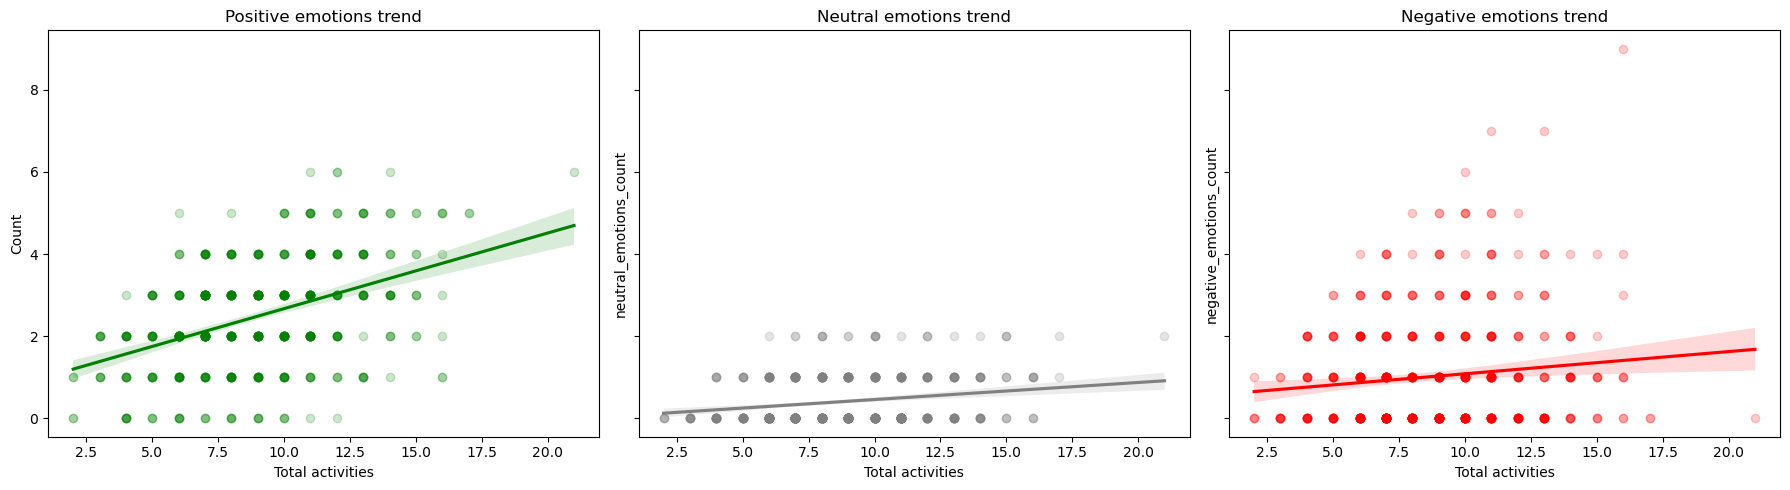

In [11]:
x = df['activities_count']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.regplot(x=x, y=df['positive_emotions_count'], ax=axes[0], 
            color='green', scatter_kws={'alpha':0.2})
axes[0].set_title('Positive emotions trend')
axes[0].set_xlabel('Total activities')
axes[0].set_ylabel('Count')

sns.regplot(x=x, y=df['neutral_emotions_count'], ax=axes[1], 
            color='gray', scatter_kws={'alpha':0.2})
axes[1].set_title('Neutral emotions trend')
axes[1].set_xlabel('Total activities')

sns.regplot(x=x, y=df['negative_emotions_count'], ax=axes[2], 
            color='red', scatter_kws={'alpha':0.2})
axes[2].set_title('Negative emotions trend')
axes[2].set_xlabel('Total activities')

plt.tight_layout()
plt.show()

In [12]:
# Proportion of each emotion
df['positive_proportion'] = df['positive_emotions_count'] / df['emotions_count']
df['neutral_proportion'] = df['neutral_emotions_count'] / df['emotions_count']
df['negative_proportion'] = df['negative_emotions_count'] / df['emotions_count']

df[['positive_proportion', 'neutral_proportion', 'negative_proportion']].describe()

,positive_proportion,neutral_proportion,negative_proportion
count,552.000000,552.000000,552.000000
mean,0.668438,0.097396,0.234166
std,0.298098,0.144527,0.270438
min,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000
50%,0.666667,0.000000,0.200000
75%,1.000000,0.200000,0.400000
max,1.000000,0.666667,1.000000


In [13]:
total_pos = df['positive_emotions_count'].sum()
total_neu = df['neutral_emotions_count'].sum()
total_neg = df['negative_emotions_count'].sum()
total_global = df['emotions_count'].sum()

print(f"Global positive proportion: {total_pos / total_global:.2%}")
print(f"Global neutral proportion: {total_neu / total_global:.2%}")
print(f"Global negative proportion: {total_neg / total_global:.2%}")

Global positive proportion: 63.24%
Global neutral proportion: 10.50%
Global negative proportion: 26.25%


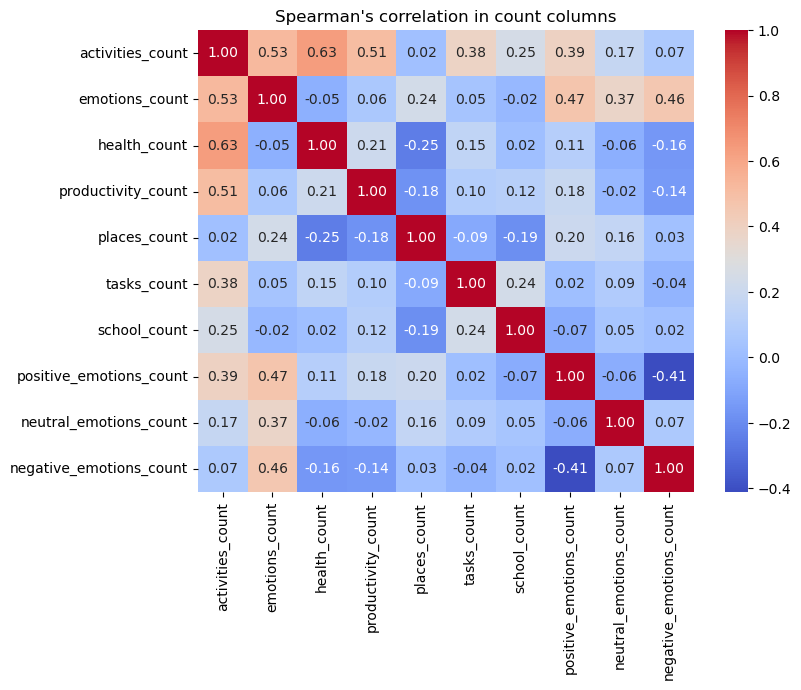

In [14]:
corr_count_cols = df.iloc[:, 12:22].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_count_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's correlation in count columns")
plt.show()

In [15]:
# Point-Biserial
onehot_activities = df.columns[22:86] 
emotions = ['positive_emotions_count', 'neutral_emotions_count', 'negative_emotions_count']

results = []

for activity in onehot_activities:
    for emotion in emotions:
        
        correlation, p_value = pointbiserialr(df[activity], df[emotion])
        
        results.append({
            'Activity': activity,
            'Emotion': emotion,
            'Correlation': correlation,
            'P-Value': p_value
        })

df_pb = pd.DataFrame(results)

# 4. Filtrar solo las que son realmente importantes (Corr > 0.3 y que sean significativas)
# Un p-value < 0.05 indica que la relación no es por azar
key_findings = df_pb[(df_pb['Correlation'].abs() > 0.4) & (df_pb['P-Value'] < 0.05)]

key_findings.sort_values(by='Correlation', ascending=False)

,Activity,Emotion,Correlation,P-Value
19,Cansado,neutral_emotions_count,0.746309,1.769670e-99
96,Feliz,positive_emotions_count,0.593665,5.809821e-54
133,Ocupado,neutral_emotions_count,0.573332,1.216326e-49
11,Ansioso,negative_emotions_count,0.567407,1.941647e-48
42,Contento,positive_emotions_count,0.564418,7.688298e-48
126,Motivado,positive_emotions_count,0.546218,2.496835e-44
147,Productivo,positive_emotions_count,0.535881,1.986044e-42
86,Estresado,negative_emotions_count,0.527944,5.167779e-41
80,Enojado,negative_emotions_count,0.480106,3.143372e-33
53,Decepcionado,negative_emotions_count,0.463815,7.578800e-31


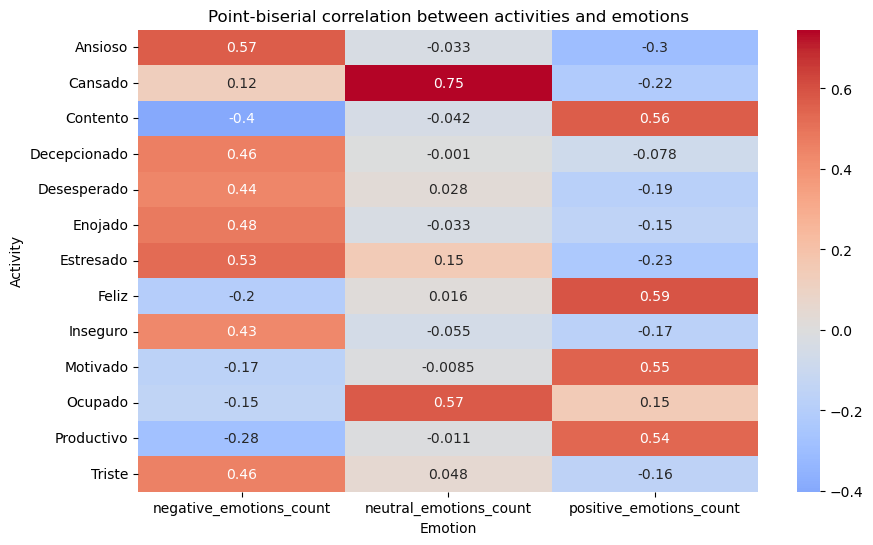

In [16]:
pivot_pb = df_pb.pivot(index='Activity', columns='Emotion', values='Correlation')

relevant = pivot_pb[pivot_pb.abs().max(axis=1) > 0.4]

plt.figure(figsize=(10, 6))
sns.heatmap(relevant, annot=True, cmap='coolwarm', center=0)
plt.title("Point-biserial correlation between activities and emotions")
plt.show()

## 3. Influence of activities on mood

In [17]:
activity_cols = df.columns[22:86]

prevalence_df = df.groupby('mood')[activity_cols].mean()

prevalence_df = prevalence_df.T

print("Top activities during \"Increíble\" days")
print(prevalence_df['Increíble'].sort_values(ascending=False).head(8))

print("\nTop activities during \"Bien\" days")
print(prevalence_df['Bien'].sort_values(ascending=False).head(8))

print("\nTop activities during \"Meh\" days")
print(prevalence_df['Meh'].sort_values(ascending=False).head(8))

print("\nTop activities during \"Mal\" days")
print(prevalence_df['Mal'].sort_values(ascending=False).head(8))

print("\nTop activities during \"Horrible\" days")
print(prevalence_df['Horrible'].sort_values(ascending=False).head(8))

Top activities during "Increíble" days
Feliz         0.962963
Contento      0.962963
Emocionado    0.629630
Salida        0.592593
Relajado      0.481481
Buen sueño    0.444444
Skin care     0.296296
Enamorado     0.259259
Name: Increíble, dtype: float64

Top activities during "Bien" days
Contento      0.918919
Relajado      0.751843
Skin care     0.523342
Buen sueño    0.518428
Agua          0.501229
Comer sano    0.491400
Ejercicio     0.405405
Feliz         0.390663
Name: Bien, dtype: float64

Top activities during "Meh" days
Relajado       0.687500
Contento       0.520833
Sueño medio    0.406250
Skin care      0.385417
Buen sueño     0.364583
Estresado      0.343750
Cansado        0.333333
Comer sano     0.322917
Name: Meh, dtype: float64

Top activities during "Mal" days
Relajado      0.55
Buen sueño    0.50
Contento      0.45
Ansioso       0.45
Estresado     0.45
Skin care     0.45
Enojado       0.40
Cansado       0.40
Name: Mal, dtype: float64

Top activities during "Horrible" d

In [18]:
def get_mood_lift(df, activity):
    active_mood = df[df[activity] == 1]['mood_numeric'].mean()
    inactive_mood = df[df[activity] == 0]['mood_numeric'].mean()
    lift = active_mood - inactive_mood
    return lift

lift_results = []
for activity in activity_cols:
    lift_results.append({
        'Activity': activity,
        'Mood_Lift': get_mood_lift(df, activity)
    })

mood_lift_df = pd.DataFrame(lift_results).sort_values(by='Mood_Lift', ascending=False)

print("Top 5 activities that increase mood the most:")
print(mood_lift_df.head(10))

print("\nTop 5 activities that decrease mood the most:")
print(mood_lift_df.tail(10))

Top 5 activities that increase mood the most:
        Activity  Mood_Lift
15  Conversación   1.217786
14      Contento   0.687120
4      Bicicleta   0.668709
45           Paz   0.588729
32         Feliz   0.418197
22    Emocionado   0.414349
55        Salida   0.390654
30        Evento   0.376068
23     Enamorado   0.344986
42      Motivado   0.282375

Top 5 activities that decrease mood the most:
        Activity  Mood_Lift
0       Aburrido  -0.533622
18   Desesperado  -0.550342
28     Estresado  -0.586109
41         Miedo  -0.686683
47    Preocupado  -0.709829
19   Desmotivado  -0.755659
46     Pensativo  -0.799632
17  Decepcionado  -0.801763
26       Enojado  -0.804312
62        Triste  -1.055898


## 4. Relationship between productivity and mood

In [19]:
df['productivity_count'].describe()

count    553.00000
mean       0.97830
std        1.12106
min        0.00000
25%        0.00000
50%        1.00000
75%        2.00000
max        6.00000
Name: productivity_count, dtype: float64

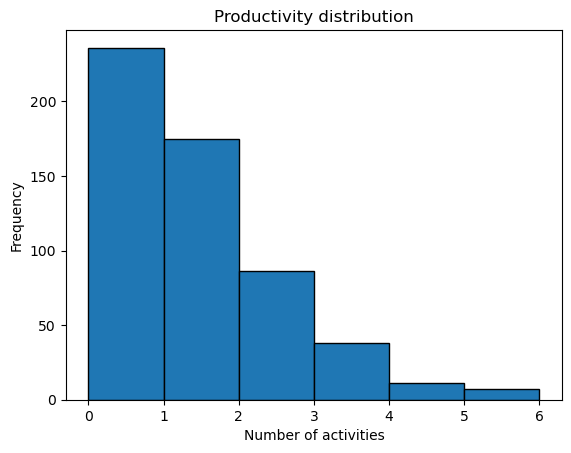

In [20]:
plt.hist(df['productivity_count'], edgecolor='black', bins=6)

plt.xlabel('Number of activities')
plt.ylabel('Frequency') 
plt.title("Productivity distribution")

plt.show()

In [21]:
prod_corr = df['productivity_count'].corr(df['mood_numeric'])

print(f"Correlation between productivity and mood: {prod_corr:.2f}")

Correlation between productivity and mood: 0.11


In [22]:
productivity_activities = ["Lectura", "Iniciar temprano", "Enfocado", "Inglés", "IA & Data", "Algoritmos", "Reunión", "Proyecto"]
target = 'mood_numeric'

results = []

for activity in productivity_activities:
    corr, p_val = pointbiserialr(df[activity], df[target])
    
    results.append({
        'Productive_activity': activity,
        'Correlation': corr,
        'P_Value': p_val
    })

productivity_impact = pd.DataFrame(results).sort_values(by='Correlation', ascending=False)

productivity_impact

,Productive_activity,Correlation,P_Value
0,Lectura,0.086928,0.041008
2,Enfocado,0.070912,0.095734
3,Inglés,0.070678,0.096840
5,Algoritmos,0.054529,0.200425
4,IA & Data,0.040949,0.336463
7,Proyecto,0.039833,0.349807
1,Iniciar temprano,0.030294,0.477120
6,Reunión,-0.063566,0.135451


## 5. Positive or negative routines by analyzing combinations of frequent activities

In [23]:
from itertools import combinations

activity_cols = df.columns[22:86].tolist()

pair_data = []

for act1, act2 in combinations(activity_cols, 2):
    both_active = df[(df[act1] == 1) & (df[act2] == 1)]
    count = len(both_active)
    
    if count >= 10: 
        avg_mood = both_active['mood_numeric'].mean()
        pair_data.append({
            'Routine': f"{act1} + {act2}",
            'Frequency': count,
            'Average_Mood': avg_mood
        })

routines_df = pd.DataFrame(pair_data)

In [24]:
baseline_mood = df['mood_numeric'].mean()

routines_df['Mood_Impact'] = routines_df['Average_Mood'] - baseline_mood

positive_routines = routines_df.sort_values(by='Mood_Impact', ascending=False).head(10)
negative_routines = routines_df.sort_values(by='Mood_Impact', ascending=True).head(10)

print(f"Global average mood: {baseline_mood:.2f}\n")

print("Top positive routines (Activities that boost mood together):")
print(positive_routines[['Routine', 'Frequency', 'Mood_Impact']])

print("\nTop negative routines (Activities that drain mood together):")
print(negative_routines[['Routine', 'Frequency', 'Mood_Impact']])

Global average mood: 2.79

Top positive routines (Activities that boost mood together):
                     Routine  Frequency  Mood_Impact
335      Emocionado + Salida         17     0.625146
270           Contento + Paz         10     0.613382
485        Motivado + Salida         10     0.613382
337  Emocionado + Sueño malo         12     0.546715
285  Correr / Cardio + Feliz         13     0.521074
331     Emocionado + Ocupado         13     0.521074
412           Feliz + Salida         44     0.508836
328       Emocionado + Feliz         46     0.495990
155         Cansado + Salida         18     0.491159
339        Enamorado + Feliz         18     0.435604

Top negative routines (Activities that drain mood together):
                       Routine  Frequency  Mood_Impact
287     Decepcionado + Enojado         10    -1.586618
70      Ansioso + Decepcionado         15    -1.386618
288   Decepcionado + Estresado         11    -1.332073
87            Ansioso + Triste         11    -1

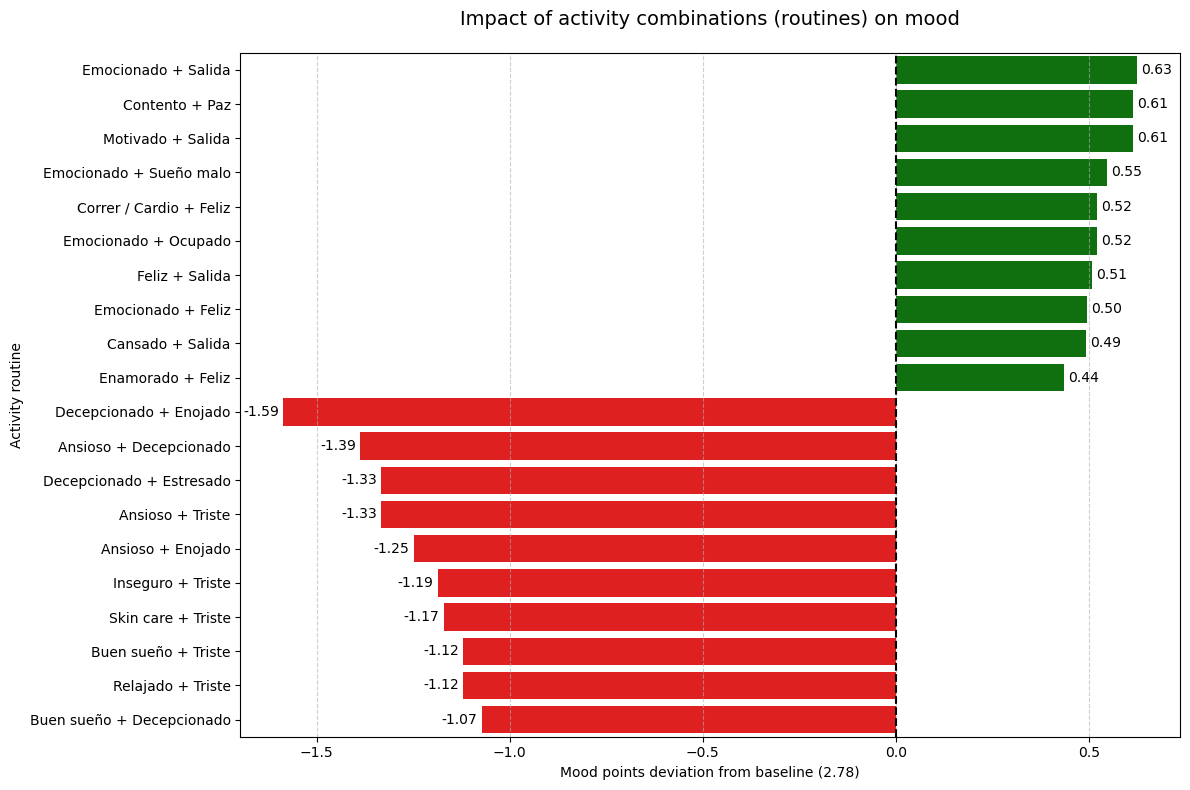

In [25]:
top_routines = pd.concat([positive_routines, negative_routines])

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_routines['Mood_Impact']]

ax = sns.barplot(
    data=top_routines, 
    x='Mood_Impact', 
    y='Routine', 
    hue='Routine',
    palette=colors,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.axvline(0, color='black', lw=1.5, ls='--')
plt.title('Impact of activity combinations (routines) on mood', fontsize=14, pad=20)
plt.xlabel('Mood points deviation from baseline (2.78)')
plt.ylabel('Activity routine')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

$\frac{routine}{average\ mood} = percentage\ of\ how\ much\ mood\ changes\ positively\ or\ negatively$